**Notebook content:**
- First model: logistic regression 
- 

In [157]:
%reset -f 

In [158]:
from myDefs.defs import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn import metrics
from IPython.display import display

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
#pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.precision = 4

#import sys
np.set_printoptions(threshold=sys.maxsize) #- print the full NumPy array

# visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline


In [159]:
INPUT_PATH = DATA_PATH + 'pre_matrix0.xlsx'
OUTPUT_PATH0 = DATA_PATH + 'matrix0_missing_values.xlsx'
OUTPUT_PATH1 = DATA_PATH + 'matrix0.xlsx'

**Read events file**

In [160]:
df = pd.read_excel(INPUT_PATH, header=[0,1,2,3], index_col=0)

In [161]:
df.shape

(525, 894)

In [162]:
df.head()

type      metadata                                                        \
time       general                                                         
feature        Sex      Age   Urgency Surgical approach Anastomotic Leak   
statistic constant constant  constant          constant         constant   
pid                                                                        
1123813       male     59.0  elective              Open                1   
1135541     female     43.0  elective              Open                0   
3918745     female     57.0  elective      Laparoscopic                0   
4894647        NaN      NaN  elective              Open                0   
6541482     female     65.0    urgent              Open                0   

type      numeric_events                                                 \
time      before_surgery                                                  
feature          Albumin                     Alkaline Phosphatase         
statistic            max    mean median  min                  max  mean   
pid                                                                       
1123813              4.2  4.2000   4.20  4.2                 97.0  97.0   
1135541              NaN     NaN    NaN  NaN                  NaN   NaN   
3918745              3.9  3.9000   3.90  3.9                 90.0  90.0   
4894647              4.3  4.3000   4.30  4.3                 70.0  70.0   
6541482              3.1  1.9429   1.95  1.4                123.0  94.0   

type                                     ...             drugs  \
time                                     ...          all_days   
feature                Amylase           ... Magnesium sulfate   
statistic median   min     max     mean  ...             count   
pid                                      ...                     
1123813     97.0  97.0    63.0  63.0000  ...               4.0   
1135541      NaN   NaN     NaN      NaN  ...               NaN   
3918745     90.0  90.0    53.0  53.0000  ...               NaN   
4894647     70.0  70.0     NaN      NaN  ...               1.0   
6541482    112.5  33.0    68.0  32.6923  ...               7.0   

type                                                                           \
time                                                                            
feature   Magnesium sulfate  Meroken new Meropenem Metronidazole Morphine hcl   
statistic              count       count     count         count        count   
pid                                                                             
1123813                  NaN         1.0      22.0          52.0          3.0   
1135541                  NaN         NaN       NaN          26.0          NaN   
3918745                  NaN         NaN       NaN           NaN          NaN   
4894647                  1.0         1.0       NaN          73.0          NaN   
6541482                  NaN         NaN       NaN          51.0          2.0   

type                                                                       \
time                                                                        
feature   Morphine hcl  Norepinephrine Norepinephrine + dextrose Optalgin   
statistic         count          count                     count    count   
pid                                                                         
1123813             NaN           30.0                       NaN      2.0   
1135541             3.0            NaN                       NaN      NaN   
3918745             NaN            NaN                       NaN      NaN   
4894647             NaN            NaN                       NaN      3.0   
6541482             NaN           20.0                       NaN      NaN   

type                                                                         
time                                                                         
feature   Piperacillin / tazobactam Prednisone Propranolol Vaben Vancomycin  
statistic  

In [163]:
n = df.columns.get_level_values('feature').nunique() - df['metadata'].shape[1]
print("number of features:", n)

number of features: 138


# Process data 


## Remove columns by missing values

In [164]:
n = df.columns.get_level_values('feature').nunique() - df['metadata'].shape[1]
print("Num features before dropping columns:", n)

Num features before dropping columns: 138


In [165]:
npatients = df.shape[0]

In [166]:
#filter "numeric events" columns
v = df[['numeric_events']].isna().sum().gt(npatients*0.50) #gt = greater than
df.drop(v.index[v], axis=1, inplace=True)

In [167]:
#filter drugs columns
v = df[['drugs']].isna().sum().gt(npatients*0.80)
df.drop(v.index[v], axis=1, inplace=True)

In [168]:
n = df.columns.get_level_values('feature').nunique() - df['metadata'].shape[1]
print("Num columns after dropping columns:", df.shape[1])
print("Num features after dropping columns:", n)


Num columns after dropping columns: 480
Num features after dropping columns: 71


In [169]:
a = df[('numeric_events', 'before_surgery')].columns.get_level_values('feature').nunique()
b = df[('numeric_events', 'after_surgery')].columns.get_level_values('feature').nunique()
c = df[('drugs')].columns.get_level_values('feature').nunique()

print(" numeric events, before surgery:", a)
print(" numeric events, after surgery:", b)
print(" numeric events, drugs:", c)

a*4+b*4+c

 numeric events, before surgery: 53
 numeric events, after surgery: 64
 numeric events, drugs: 7


C:\Users\hp4mp\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


475

In [170]:
if WRITE_FLAG:
    df.to_excel(OUTPUT_PATH0)

## Fill missing data

In [171]:
#fill numeric events with median 
df['numeric_events'] = df['numeric_events'].fillna(df['numeric_events'].median())

In [172]:
#fill missing values in dtugs with 0 
df['drugs'] = df['drugs'].fillna(0)

In [173]:
#fill numeric events with median 
df.iloc[:,1] = df.iloc[:,1].fillna(df.iloc[:,1].median())

In [174]:
df.head()

type      metadata                                                        \
time       general                                                         
feature        Sex      Age   Urgency Surgical approach Anastomotic Leak   
statistic constant constant  constant          constant         constant   
pid                                                                        
1123813       male     59.0  elective              Open                1   
1135541     female     43.0  elective              Open                0   
3918745     female     57.0  elective      Laparoscopic                0   
4894647        NaN     55.0  elective              Open                0   
6541482     female     65.0    urgent              Open                0   

type      numeric_events                                                 \
time      before_surgery                                                  
feature          Albumin                     Alkaline Phosphatase         
statistic            max    mean median  min                  max  mean   
pid                                                                       
1123813              4.2  4.2000   4.20  4.2                 97.0  97.0   
1135541              4.1  4.0000   4.00  3.9                 94.0  91.0   
3918745              3.9  3.9000   3.90  3.9                 90.0  90.0   
4894647              4.3  4.3000   4.30  4.3                 70.0  70.0   
6541482              3.1  1.9429   1.95  1.4                123.0  94.0   

type                                     ...                                \
time                                     ... after_surgery                   
feature                Amylase           ...    saturation                   
statistic median   min     max     mean  ...           max     mean median   
pid                                      ...                                 
1123813     97.0  97.0    63.0  63.0000  ...         100.0  97.1693   98.0   
1135541     91.0  84.0    68.0  60.5000  ...         100.0  97.9277   98.0   
3918745     90.0  90.0    53.0  53.0000  ...         100.0  96.7879   97.0   
4894647     70.0  70.0    68.0  60.5000  ...         100.0  96.7396   98.0   
6541482    112.5  33.0    68.0  32.6923  ...         100.0  97.2320   98.0   

type                                              drugs              \
time                                           all_days               
feature         weight                        Cefazolin Ceftriaxone   
statistic   min     max     mean median   min     count       count   
pid                                                                   
1123813    85.0   108.0  96.9667  105.0  85.3       6.0        13.0   
1135541    94.0    68.0  68.0000   68.0  68.0       0.0        10.0   
3918745    91.0    80.0  78.0000   78.0  76.0       0.0         0.0   
4894647     0.0    85.0  71.1250   74.6   0.0       5.0        12.0   
6541482    80.0    58.0  54.6667   53.0  53.0       4.0        15.0   

type                                                                          
time                                                                          
feature   Fleet enema Furosemide Magnesium sulfate Meroken new Metronidazole  
statistic       count      count             count       count         count  
pid                                                                           
1123813           1.0       16.0               4.0         1.0          52.0  
1135541           0.0        2.0               0.0         0.0          26.0  
3918745           0.0        0.0               0.0         0.0           0.0  
4894647           1.0       38.0               1.0         1.0          73.0  
6541482           0.0      151.0               7.0         0.0          51.0  

[5 rows x 480 columns]

In [175]:
'''#read events
path = DATA_PATH + "parseData2.csv"
df = pd.read_csv(path, sep=',') 
#parse date of surgery
df['eventStartDate'] = pd.to_datetime(df['eventStartDate'], format='%Y-%m-%d')
df['eventEndDate'] = pd.to_datetime(df['eventEndDate'], format='%Y-%m-%d')

#read annonymous file
path = "{}parseAnonymous0.csv".format(DATA_PATH)
anonymous = pd.read_csv(path, sep=',')
#parse date of surgery
anonymous['Date of surgery'] = pd.to_datetime(anonymous['Date of surgery'], format='%Y-%m-%d')'''

'#read events\npath = DATA_PATH + "parseData2.csv"\ndf = pd.read_csv(path, sep=\',\') \n#parse date of surgery\ndf[\'eventStartDate\'] = pd.to_datetime(df[\'eventStartDate\'], format=\'%Y-%m-%d\')\ndf[\'eventEndDate\'] = pd.to_datetime(df[\'eventEndDate\'], format=\'%Y-%m-%d\')\n\n#read annonymous file\npath = "{}parseAnonymous0.csv".format(DATA_PATH)\nanonymous = pd.read_csv(path, sep=\',\')\n#parse date of surgery\nanonymous[\'Date of surgery\'] = pd.to_datetime(anonymous[\'Date of surgery\'], format=\'%Y-%m-%d\')'

## Get x and y

In [176]:
to_drop = [df.columns[0], df.columns[2], df.columns[3], df.columns[4]]
x = df.drop(columns=to_drop)
x.head()

type      metadata numeric_events                                           \
time       general before_surgery                                            
feature        Age        Albumin                     Alkaline Phosphatase   
statistic constant            max    mean median  min                  max   
pid                                                                          
1123813       59.0            4.2  4.2000   4.20  4.2                 97.0   
1135541       43.0            4.1  4.0000   4.00  3.9                 94.0   
3918745       57.0            3.9  3.9000   3.90  3.9                 90.0   
4894647       55.0            4.3  4.3000   4.30  4.3                 70.0   
6541482       65.0            3.1  1.9429   1.95  1.4                123.0   

type                                                                         \
time                                                                          
feature                      Amylase                       BASO (%)           
statistic  mean median   min     max     mean median   min      max    mean   
pid                                                                           
1123813    97.0   97.0  97.0    63.0  63.0000   63.0  63.0      0.5  0.5000   
1135541    91.0   91.0  84.0    68.0  60.5000   60.0  56.0      0.5  0.4000   
3918745    90.0   90.0  90.0    53.0  53.0000   53.0  53.0      0.4  0.4000   
4894647    70.0   70.0  70.0    68.0  60.5000   60.0  56.0      0.3  0.3000   
6541482    94.0  112.5  33.0    68.0  32.6923   29.0   9.0      0.3  0.1214   

type       ...                                                              \
time       ... after_surgery                                                 
feature    ...    saturation                       weight                    
statistic  ...           max     mean median   min     max     mean median   
pid        ...                                                               
1123813    ...         100.0  97.1693   98.0  85.0   108.0  96.9667  105.0   
1135541    ...         100.0  97.9277   98.0  94.0    68.0  68.0000   68.0   
3918745    ...         100.0  96.7879   97.0  91.0    80.0  78.0000   78.0   
4894647    ...         100.0  96.7396   98.0   0.0    85.0  71.1250   74.6   
6541482    ...         100.0  97.2320   98.0  80.0    58.0  54.6667   53.0   

type                drugs                                     \
time             all_days                                      
feature         Cefazolin Ceftriaxone Fleet enema Furosemide   
statistic   min     count       count       count      count   
pid                                                            
1123813    85.3       6.0        13.0         1.0       16.0   
1135541    68.0       0.0        10.0         0.0        2.0   
3918745    76.0       0.0         0.0         0.0        0.0   
4894647     0.0       5.0        12.0         1.0       38.0   
6541482    53.0       4.0        15.0         0.0      151.0   

type                                                   
time                                                   
feature   Magnesium sulfate Meroken new Metronidazole  
statistic             count       count         count  
pid                                                    
1123813                 4.0         1.0          52.0  
1135541                 0.0         0.0          26.0  
3918745                 0.0         0.0           0.0  
4894647                 1.0         1.0          73.0  
6541482                 7.0         0.0          51.0  

[5 rows x 476 columns]

In [177]:
y = df.iloc[:, 4]
y.name = "labels"

## Exploration

,counts
AL,482
non-AL,43


percentage of num Anastomotic leak: 8.19%


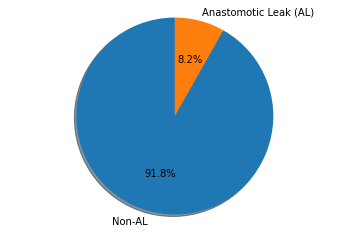

In [178]:
counts = y.value_counts().to_frame()
counts.index = ["AL", "non-AL"]
counts.columns = ["counts"]
display(counts)

percent = y.sum()/len(y) 
print("percentage of num Anastomotic leak: {:.2f}%".format(percent*100))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non-AL', 'Anastomotic Leak (AL)'
sizes = [len(y) - y.sum(), y.sum()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## train - test

In [179]:
#The stratify parameter makes a split so that the proportion of values in the sample produced 
#will be the same as the proportion of values provided to parameter stratify.

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

In [188]:
traintest = pd.concat([y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)], axis=1).T #normalize=False
traintest.index = ['train', 'test'] 
traintest.columns = ["non-AL", "AL"]
traintest['total'] = traintest.sum(axis=1)
traintest

,non-AL,AL,total
train,0.9190,0.0810,1.0
test,0.9143,0.0857,1.0


# Model 0 -  Logistic Regression 

In [182]:
#define model
model = LogisticRegression(solver='lbfgs', max_iter=100000) #liblinear
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### performances

In [186]:
def performances(model, x_train, x_test, y_train, y_test):
    
    y_pred = model.predict(x_test)
    score = model.score(x_test, y_test) 
    #accuracy: tp + tn / all
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(score))
    
    '''
    classification report
    '''
    #precision is the ratio tp / (tp + fp)
    #recall is the ratio tp / (tp / fn)
    print(classification_report(y_test, y_pred, labels=[0, 1], target_names=["no Leak", "Leak"]))
    
    
    '''
    confusion matrix
    '''
    disp = plot_confusion_matrix(model, x_test, y_test, display_labels=["no Leak", "Leak"], normalize='true') #normalize='false'
    #normalization: first row is divided by number of no leak, second is divided by number of leak
    disp.ax_.set_title("Normalized confusion matrix")
    
    '''
    roc curve
    '''
    probs = model.predict_proba(x_test)[:,1] #first index - probability that data belongs to class 0, second index - to class 1
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    
    #area under curve
    logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)

    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(logit_roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    


## round 0 

Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

     no Leak       0.96      0.91      0.93        96
        Leak       0.36      0.56      0.43         9

    accuracy                           0.88       105
   macro avg       0.66      0.73      0.68       105
weighted avg       0.90      0.88      0.89       105



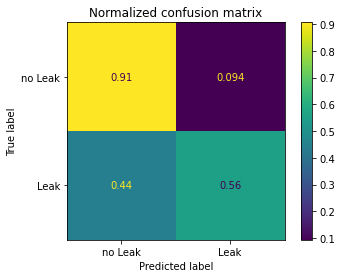

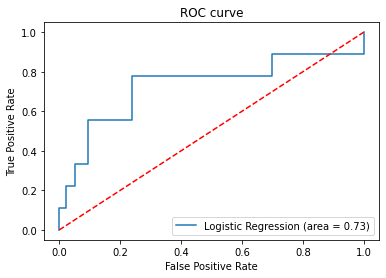

In [187]:
#split into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)
#fit
model.fit(x_train, y_train)

performances(model, x_train, x_test, y_train, y_test)

## round 1

Accuracy of logistic regression classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        96
           1       0.29      0.44      0.35         9

    accuracy                           0.86       105
   macro avg       0.62      0.67      0.63       105
weighted avg       0.89      0.86      0.87       105



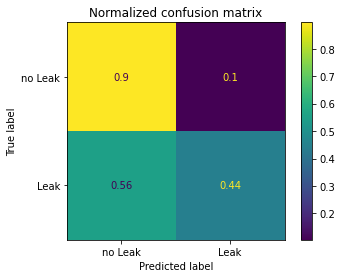

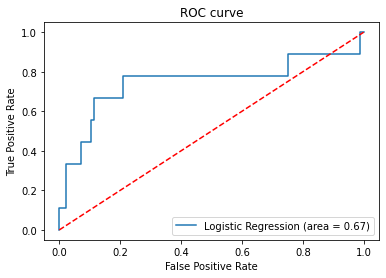

In [27]:
'''
Remove features taken after surgery
'''

x_include_before = x.copy()
cols = x.columns[x.columns.get_level_values('time') == 'after_surgery']
x = x.drop(cols, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)
#fit
model.fit(x_train, y_train)

performances(model, x_train, x_test, y_train, y_test)

## round 2

### sequential forward selection

http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [28]:
n_features = x.columns.get_level_values('feature').shape[0]
n_features

220

In [29]:
k_feautres = 30
k_feautres = (10, 100) 

FIRST_RUN = False

if FIRST_RUN:
    #Sequential Forward Selection
    sfs = SFS(model, 
              k_features=k_feautres, 
              forward=True, 
              floating=False, 
              scoring='accuracy',
              cv=5,
              n_jobs=-1)
    sfs = sfs.fit(x, y)
    
    #write to file 
    feature_idx = pd.Series(sfs.k_feature_idx_).to_frame()
    feature_idx.columns = ["feature_idx"]
    feature_idx.to_csv(DATA_PATH + "round2_sfs_feature_idx.csv", index=False)


print('\nSequential Forward Selection (k={}):'.format(k_feautres))
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection (k=(10, 100)):
(1, 5, 9, 13, 14, 15, 16, 17, 18, 19, 20, 26, 27, 28, 32, 34, 35, 40, 41, 42, 43, 49, 50, 51, 52, 56, 57, 61, 73, 74, 75, 76, 81, 89, 99, 101, 102, 103, 106, 107, 112, 121, 122, 123, 124, 125, 126, 127, 128, 132, 134, 136, 140, 148, 198)
CV Score:
0.9333333333333333


In [79]:
print('best combination (ACC):', sfs.k_score_)
print('', sfs.k_feature_idx_)
#print('all subsets:\n', sfs.subsets_)


best combination (ACC): 0.9333333333333333
 (1, 5, 9, 13, 14, 15, 16, 17, 18, 19, 20, 26, 27, 28, 32, 34, 35, 40, 41, 42, 43, 49, 50, 51, 52, 56, 57, 61, 73, 74, 75, 76, 81, 89, 99, 101, 102, 103, 106, 107, 112, 121, 122, 123, 124, 125, 126, 127, 128, 132, 134, 136, 140, 148, 198)


In [82]:
sfs_table = pd.DataFrame.from_dict(sfs.get_metric_dict()).T.head()
display(sfs_table)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.9333333333333333, 0.9142857142857143, 0.904...",0.9238,"((numeric_events, before_surgery, Amylase, max),)",0.01548,0.01205,0.006023
2,"(9, 140)","[0.9333333333333333, 0.9142857142857143, 0.914...",0.9276,"((numeric_events, before_surgery, Amylase, max...",0.01469,0.01143,0.005714
3,"(9, 32, 140)","[0.9333333333333333, 0.9142857142857143, 0.914...",0.9295,"((numeric_events, before_surgery, Amylase, max...",0.01832,0.01425,0.007127
4,"(9, 32, 107, 140)","[0.9333333333333333, 0.9142857142857143, 0.923...",0.9314,"((numeric_events, before_surgery, Amylase, max...",0.01624,0.01263,0.006317
5,"(1, 9, 32, 107, 140)","[0.9333333333333333, 0.9142857142857143, 0.923...",0.9314,"((numeric_events, before_surgery, Albumin, max...",0.01624,0.01263,0.006317


In [153]:
#plot 
plt.figure(figsize=(8,12))
fig1 = plot_sfs(sfs.get_metric_dict(), figsize=(30,8), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

NameError: name 'sfs' is not defined

<Figure size 576x864 with 0 Axes>

In [101]:
chosen_columns = x.iloc[:, list(sfs.k_feature_idx_)].columns.get_level_values('feature')
print(chosen_columns.nunique())
chosen_columns.value_counts()

28


INR                     4
BASO (%)                4
Nucleated RBC (%)       4
Nucleated RBC (abs)     4
BASO (abs)              4
EOS (abs)               4
Bilirubin, direct       3
MONO (abs)              3
Creatinine              3
PCT                     2
MPV                     2
Calcium, total          2
PLT                     1
MCHC                    1
Glucose                 1
heart rate              1
Magnesium               1
MONO (%)                1
Bilirubin, total        1
Albumin                 1
Osmolality (calc.)      1
PTT                     1
Amylase                 1
Chloride                1
Alkaline Phosphatase    1
Estimated Globulin      1
LYMPHO (abs)            1
Gamma-GT                1
Name: feature, dtype: int64

### Generate the new subsets based on the selected features

In [190]:
# Generate the new subsets based on the selected features

#split into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y) 
x_train_sfs = x_train.iloc[:, list(sfs.k_feature_idx_)]
x_test_sfs = x_test.iloc[:, list(sfs.k_feature_idx_)]

Accuracy of logistic regression classifier on test set: 0.92
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        96
           1       0.67      0.22      0.33         9

    accuracy                           0.92       105
   macro avg       0.80      0.61      0.65       105
weighted avg       0.91      0.92      0.91       105



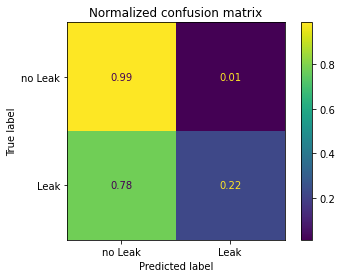

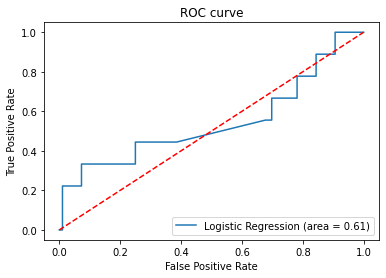

In [36]:
# Fit the estimator using the new feature subset
# and make a prediction on the test data
model.fit(x_train_sfs, y_train)

y_pred = model.predict(x_test_sfs)

performances(model, x_train_sfs, x_test_sfs, y_train, y_test)

## round 3

In [122]:

k_feautres = (10, 100) 

#Sequential Forward Selection
sfs1 = SFS(model, 
          k_features=k_feautres, 
          forward=True, 
          floating=False, 
          scoring='recall',
          cv=5,
          n_jobs=-1)
sfs1 = sfs1.fit(x, y)

print('\nSequential Forward Selection (k={}):'.format(k_feautres))
print(sfs1.k_feature_idx_)
print('CV Score:')
print(sfs1.k_score_)



Sequential Forward Selection (k=(10, 100)):
(0, 1, 2, 3, 4, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 81, 84, 85, 86, 89, 90, 91, 92, 93, 96, 100, 102, 104, 110, 116, 121, 122, 125, 127, 147, 151, 156, 161, 177, 189, 196, 215, 217, 219)
CV Score:
0.5916666666666666


In [123]:
len(sfs1.k_feature_idx_)

87

In [124]:
# Generate the new subsets based on the selected features

#split into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

x_train_sfs = x_train.iloc[:, list(sfs1.k_feature_idx_)]
x_test_sfs = x_test.iloc[:, list(sfs1.k_feature_idx_)]

Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        96
           1       0.50      0.11      0.18         9

    accuracy                           0.91       105
   macro avg       0.71      0.55      0.57       105
weighted avg       0.89      0.91      0.89       105



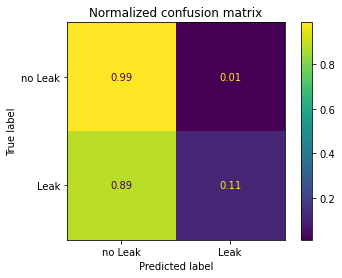

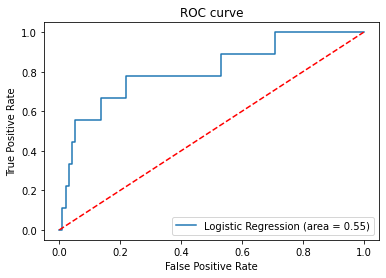

In [125]:
# Fit the estimator using the new feature subset
# and make a prediction on the test data
model.fit(x_train_sfs, y_train)

y_pred = model.predict(x_test_sfs)

performances(model, x_train_sfs, x_test_sfs, y_train, y_test)

## round 4

In [155]:

k_feautres = (10, 100) 
k_feautres = 50
#Sequential Forward Selection
sfs2 = SFS(model, 
          k_features=k_feautres, 
          forward=True, 
          floating=False, 
          scoring='precision',
          cv=5,
          n_jobs=-1)
sfs2 = sfs2.fit(x, y)

print('\nSequential Forward Selection (k={}):'.format(k_feautres))
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential Forward Selection (k=50):
(2, 3, 4, 5, 9, 14, 15, 16, 17, 18, 19, 20, 26, 27, 28, 30, 32, 36, 42, 43, 44, 45, 49, 50, 51, 52, 74, 76, 81, 85, 86, 92, 97, 102, 103, 104, 106, 107, 108, 123, 362, 416, 450)
CV Score:
1.0



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...